In [ ]:
train_dir = 'Dataset/split/train'
val_dir = 'Dataset/split/val'

In [ ]:
import os
print(os.listdir(train_dir))

['without_mask', 'with_mask']


In [ ]:
import os
print(len(os.listdir(train_dir + '/with_mask')))

print(len(os.listdir(train_dir + '/without_mask')))

print(len(os.listdir(val_dir + '/with_mask')))

print(len(os.listdir(val_dir + '/without_mask')))

1332
1342
570
576


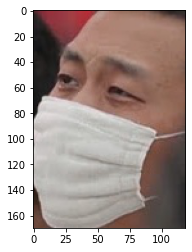

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

im1 = Image.open(r'/content/drive/My Drive/AI Project/Mask detection Main/split/train/with_mask/0_0_0 copy 23.jpg')
#im1.show()
plt.imshow(im1)



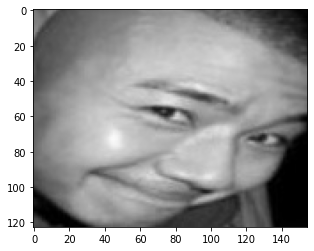

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

im1 = Image.open(r'/content/drive/My Drive/AI Project/Mask detection Main/split/train/without_mask/0_0_anhu_0201.jpg')
#im1.show()
plt.imshow(im1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    fill_mode="nearest",
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.10,
    rotation_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 2674 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 1146 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
import math

batch_size = 32
training_size = 2674
val_size = 1146 
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(val_size)

print(steps_per_epoch,val_steps)

84 36


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_213 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_233 (BatchN (None, 111, 111, 32) 96          conv2d_213[0][0]                 
__________________________________________________________________________________________________
activation_233 (Activation)     (None, 111, 111, 32) 0           batch_normalization_233[0][0]    
_______________________________________________________________________________________

In [ ]:
inc_history = model.fit_generator(train_generator,
                                  validation_data = validation_generator,
                                  #steps_per_epoch = 100,
                                  epochs = 10)

Epoch 1/10
79/84 [===========================>..] - ETA: 2s - loss: 0.0979 - accuracy: 0.9853

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


84/84 [==============================] - 82s 975ms/step - loss: 0.1013 - accuracy: 0.9850 - val_loss: 0.3936 - val_accuracy: 0.9529
Epoch 2/10
84/84 [==============================] - 42s 505ms/step - loss: 0.0378 - accuracy: 0.9929 - val_loss: 0.0853 - val_accuracy: 0.9878
Epoch 3/10
84/84 [==============================] - 43s 506ms/step - loss: 0.0378 - accuracy: 0.9940 - val_loss: 0.0388 - val_accuracy: 0.9939
Epoch 4/10
84/84 [==============================] - 42s 503ms/step - loss: 0.0205 - accuracy: 0.9981 - val_loss: 0.0318 - val_accuracy: 0.9948
Epoch 5/10
84/84 [==============================] - 42s 503ms/step - loss: 0.0223 - accuracy: 0.9948 - val_loss: 0.0272 - val_accuracy: 0.9948
Epoch 6/10
84/84 [==============================] - 42s 505ms/step - loss: 0.0188 - accuracy: 0.9966 - val_loss: 0.2154 - val_accuracy: 0.9799
Epoch 7/10
84/84 [==============================] - 43s 510ms/step - loss: 0.0267 - accuracy: 0.9955 - val_loss: 0.0459 - val_accuracy: 0.9939
Epoch 8/10

Text(0.5, 1.0, 'Training and validation loss')

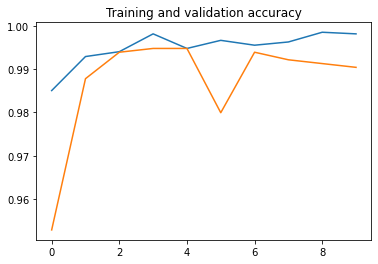

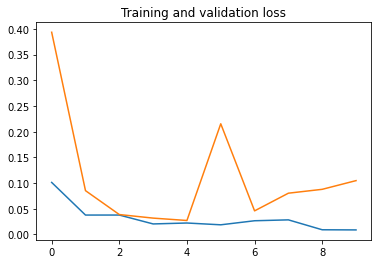

In [ ]:
acc      = inc_history.history['accuracy']
val_acc  = inc_history.history['val_accuracy']
loss     = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss')

In [ ]:
model.save('/content/drive/My Drive/AI Project/Mask detection Main/Inception V3/model.h5')

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import keras

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/content/drive/My Drive/AI Project/Mask detection Main/split/val/without_mask/1_0_aidai_0112.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

#model_final = keras.models.load_model('/content/drive/My Drive/AI Project/Mask detection Main/Models/mask-detection_model.h5')
# run the inference
prediction = model.predict(data)
print(prediction)
if prediction < 0.5 :
  print("Good job!! \nThe Mask is ON ")
else:
  print("Bad job!! \nNo Mask ")  

[[1.]]
Bad job!! 
No Mask 
